In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ADITYA\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
assets = ['M&M.NS','SBIN.NS','ICICIBANK.NS','ULTRACEMCO.NS','ITC.NS','INFY.NS','WIPRO.NS','NESTLEIND.NS','LT.NS','VEDL.NS','IOC.NS','DRREDDY.NS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [3]:
pf1=pf_data.drop(['NESTLEIND.NS'],inplace=False,axis=1)

In [4]:
pf1

,M&M.NS,SBIN.NS,ICICIBANK.NS,ULTRACEMCO.NS,ITC.NS,INFY.NS,WIPRO.NS,LT.NS,VEDL.NS,IOC.NS,DRREDDY.NS
Date,,,,,,,,,,,
2010-01-04,226.646637,95.066895,85.319977,929.778442,65.326035,129.378204,107.914261,607.630798,279.402100,26.569504,1047.040039
2010-01-05,230.819916,95.102180,86.130264,949.026489,65.969872,129.811600,109.617630,608.709229,281.461243,26.670839,1079.400391
2010-01-06,236.355637,95.672699,86.789574,950.181396,66.124397,127.917488,107.401352,601.972656,278.456909,26.632839,1107.085571
2010-01-07,231.852585,95.137444,85.970222,941.567871,65.918411,125.042534,105.495438,599.081421,275.317535,26.214857,1089.942627
2010-01-08,231.872665,94.853218,84.762535,953.068604,66.060043,122.029282,103.908943,602.870728,272.887115,26.662392,1094.663696
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,280.700012,175.500000,286.649994,3041.600098,177.899994,585.700012,180.000000,774.650024,62.799999,79.500000,3146.800049
2020-04-07,321.000000,186.399994,326.100006,3279.500000,181.550003,639.000000,191.899994,801.650024,66.750000,83.000000,3583.199951
2020-04-08,326.399994,183.000000,318.950012,3256.449951,178.649994,631.599976,192.899994,807.099976,70.300003,81.750000,3683.000000


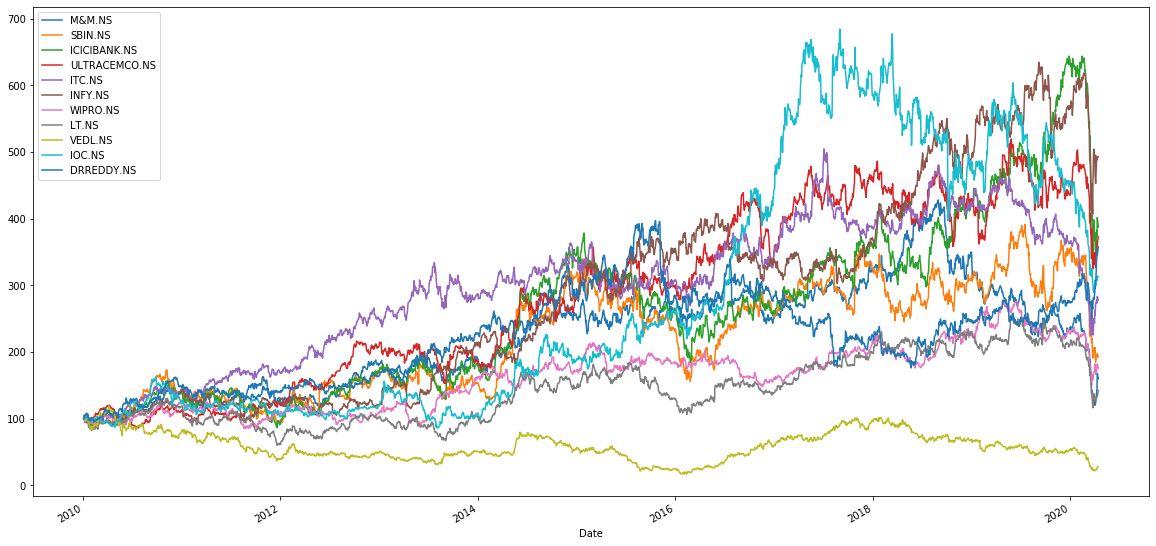

In [5]:
(pf1/pf1.iloc[0] *100).plot(figsize=(20,10))
plt.savefig('stocks1.jpg')

In [6]:
pf2=pf_data[['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS']]

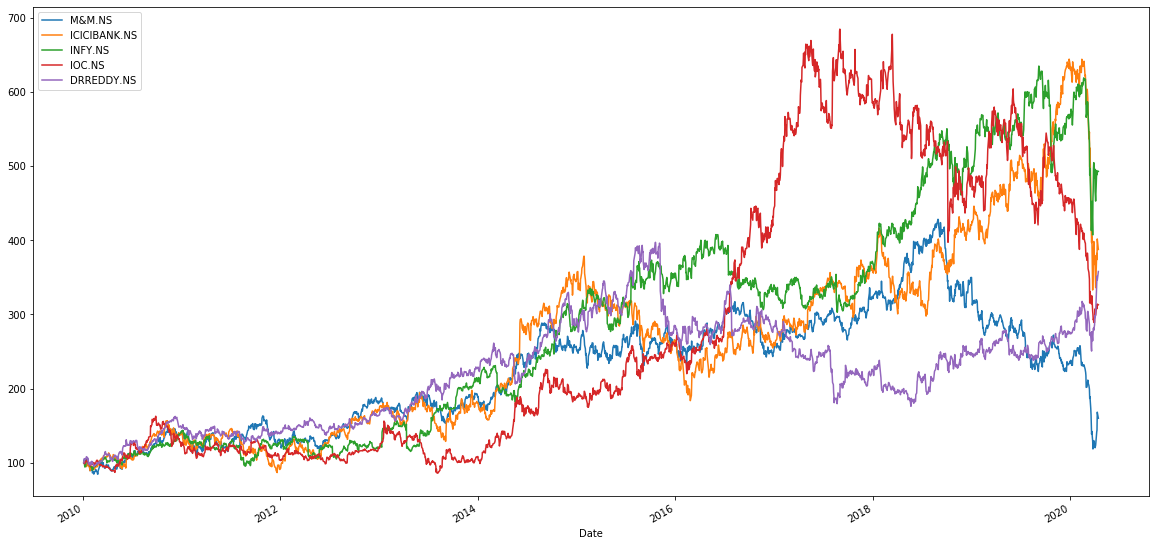

In [7]:
(pf2/pf2.iloc[0]*100).plot(figsize=(20,10))

In [8]:
log_return=np.log(pf2/pf2.shift(1))

In [9]:
log_return.mean()*250

M&M.NS          0.046520
ICICIBANK.NS    0.133912
INFY.NS         0.157637
IOC.NS          0.112780
DRREDDY.NS      0.126026
dtype: float64

In [10]:
log_return.cov()

,M&M.NS,ICICIBANK.NS,INFY.NS,IOC.NS,DRREDDY.NS
M&M.NS,0.000354,0.000171,0.000062,0.000092,0.000062
ICICIBANK.NS,0.000171,0.000455,0.000091,0.000125,0.000071
INFY.NS,0.000062,0.000091,0.000328,0.000020,0.000051
IOC.NS,0.000092,0.000125,0.000020,0.000424,0.000033
DRREDDY.NS,0.000062,0.000071,0.000051,0.000033,0.000283


In [11]:
log_return.corr()

,M&M.NS,ICICIBANK.NS,INFY.NS,IOC.NS,DRREDDY.NS
M&M.NS,1.000000,0.425519,0.182321,0.236834,0.194273
ICICIBANK.NS,0.425519,1.000000,0.235782,0.284251,0.198375
INFY.NS,0.182321,0.235782,1.000000,0.052993,0.166038
IOC.NS,0.236834,0.284251,0.052993,1.000000,0.096043
DRREDDY.NS,0.194273,0.198375,0.166038,0.096043,1.000000


In [12]:
# Expected Retruns

#Calculating the weights first

num=5 # number of shares in consideration
weights = np.random.random(num)
weights /= np.sum(weights)
weights

#returns

np.sum(weights * log_return.mean())*250

0.11028178209539835

In [26]:
# Portfolio Variance

#Code found on the internet xD

np.dot(weights.T, np.dot(log_return.cov() * 250, weights))  #250 i think is the number of working days in an year

0.037883719191405256

In [13]:
#Portfolio Volatility

np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 250, weights)))

0.19362859663878165

In [14]:
pfolio_returns = []
pfolio_volatilities = []
sharpe = []
risk_free_r=0.0647
weightage=[]
for x in range (10000):
    weights = np.random.random(num)
    weights /= np.sum(weights)
    weightage.append(weights)
    pfolio_returns.append(np.sum(weights * log_return.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_return.cov() * 250, weights))))
    temp=((pfolio_returns[x]-risk_free_r)/pfolio_volatilities[x])
    sharpe.append(temp)
    
    
pfolio_returns = np.array(pfolio_returns)  #Converrting list to numpy array.
pfolio_volatilities = np.array(pfolio_volatilities)
sharpe_ratio = np.array(sharpe)

pfolio_returns, pfolio_volatilities, sharpe_ratio # Each array has 10000 values.

(array([0.11644858, 0.11277485, 0.10361598, ..., 0.10723762, 0.10396564,
        0.1361562 ]),
 array([0.20765532, 0.21143902, 0.205807  , ..., 0.19265556, 0.20884419,
        0.1934106 ]),
 array([0.24920423, 0.22736983, 0.18908967, ..., 0.22079623, 0.18801405,
        0.36945335]))

In [15]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

The weightages for each stock cosnidering Maximum sharpe ratio:


                           M&M.NS  ICICIBANK.NS   INFY.NS    IOC.NS  DRREDDY.NS
Weightages of Each one  0.017173      0.110681  0.435475  0.162286    0.274385


Text(0, 0.5, 'Expected Return')

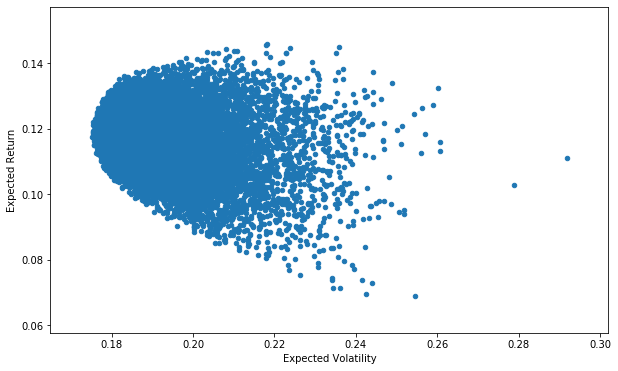

In [16]:
final_pf=pd.DataFrame(weightage[np.argmax(sharpe_ratio)], index=['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS'], columns=['Weightages of Each one'])

print('The weightages for each stock cosnidering Maximum sharpe ratio:\n\n\n',final_pf.T)

portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

The weightages for each stock cosnidering Maximum sharpe ratio:


                           M&M.NS  ICICIBANK.NS   INFY.NS    IOC.NS  DRREDDY.NS
Weightages of Each one  0.017173      0.110681  0.435475  0.162286    0.274385


The weightages for each stock cosnidering Minimum sharpe ratio(Minimum Volatility):


                           M&M.NS  ICICIBANK.NS   INFY.NS    IOC.NS  DRREDDY.NS
Weightages of Each one  0.745501      0.139694  0.054318  0.041752    0.018735


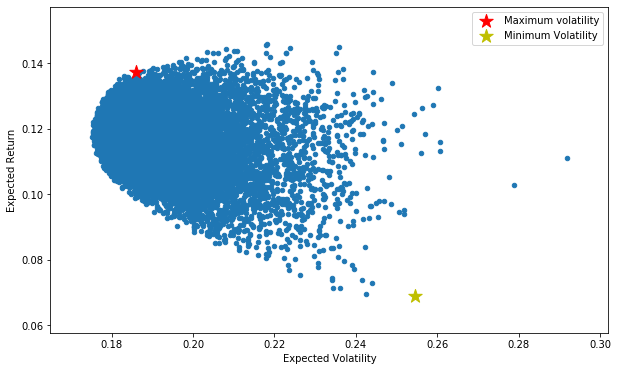

In [24]:
final_pf=pd.DataFrame(weightage[np.argmax(sharpe_ratio)], index=['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS'], columns=['Weightages of Each one'])
final_pf1=pd.DataFrame(weightage[np.argmin(sharpe_ratio)], index=['M&M.NS','ICICIBANK.NS','INFY.NS','IOC.NS','DRREDDY.NS'], columns=['Weightages of Each one'])

print('The weightages for each stock cosnidering Maximum sharpe ratio:\n\n\n',final_pf.T)
print("\n\nThe weightages for each stock cosnidering Minimum sharpe ratio(Minimum Volatility):\n\n\n",final_pf1.T)
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.scatter(pfolio_volatilities[np.argmax(sharpe_ratio)],pfolio_returns[np.argmax(sharpe_ratio)],marker='*',color='r',s=200, label='Maximum volatility')
plt.scatter(pfolio_volatilities[np.argmin(sharpe_ratio)],pfolio_returns[np.argmin(sharpe_ratio)],marker='*',color='y',s=200, label='Minimum Volatility')
plt.xlabel('Expected Volatility')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.legend()    

In [20]:
pfolio_returns[np.argmax(sharpe_ratio)]

0.13714969569651883